In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
from imblearn.over_sampling import SMOTE, ADASYN


In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])



In [3]:
def replace_outliers(X, alpha):
    num_features = X.shape[1]
    q_low = X.quantile(alpha, axis=0)
    q_up = X.quantile(1 - alpha, axis=0)
    X_new = X.values.copy()
    for i in range(num_features):
        median = X[i].median()
        for j in range(X.shape[0]):
            if X_new[j][i] < q_low[i] or X_new[j][i] > q_up[i]:
                X_new[j][i] = median
    return X_new
        

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_7_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_7_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_7_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
# pd.DataFrame(X_train_load[np.where(y_train_load==0)]).describe()

In [7]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 50)
(1000,)
(1000, 50)


In [8]:
X_train_load = replace_outliers(pd.DataFrame(X_train_load), 0.0141)
X_test_load = replace_outliers(pd.DataFrame(X_test_load), 0.0141)

In [9]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)



SelectKBest(k=1, score_func=<function mutual_info_classif at 0x114bb6b70>)

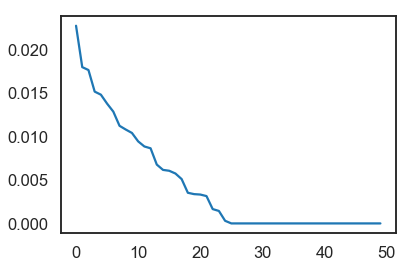

In [10]:
plt.plot(np.sort(skb.scores_)[::-1])

In [11]:
np.sort(skb.scores_)[::-1][:21]

array([ 0.02270226,  0.01794864,  0.01761542,  0.01513723,  0.01478405,
        0.01375589,  0.01283884,  0.01121076,  0.01078258,  0.0103892 ,
        0.00942149,  0.0088377 ,  0.00862621,  0.00675646,  0.0061472 ,
        0.0060464 ,  0.0057316 ,  0.00509225,  0.00351964,  0.00336401,
        0.00331638])

In [12]:
skb.k = 21

In [13]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)




In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 21)
(1000,)
(1000, 21)


In [15]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-8590 -1000
141


In [16]:
X_train_new, y_train_new = SMOTE().fit_sample(X_train, y_train)
X_test_new = np.array(X_test)

In [17]:
print(X_train_new.shape, X_test_new.shape)

(1718, 21) (1000, 21)


In [18]:
print(_asy1(y_train_new, y_train_new), _asy2(y_train_new, y_train_new))
print(np.sum(y_train_new))

-8590 -1718
859


In [19]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.725844004657
AUC 0.788982234263
NUM 471
ASY1 -3464
ASY2 -531


In [20]:
rho = 0.9
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)





ACC 0.515133876601
AUC 0.788982234263
NUM 833
ASY1 -7662
ASY2 -47


In [21]:
rho = 0.66
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.706635622817
AUC 0.788982234263
NUM 504
ASY1 -5749
ASY2 -587


In [22]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_7_answ.csv', sep = ',')
